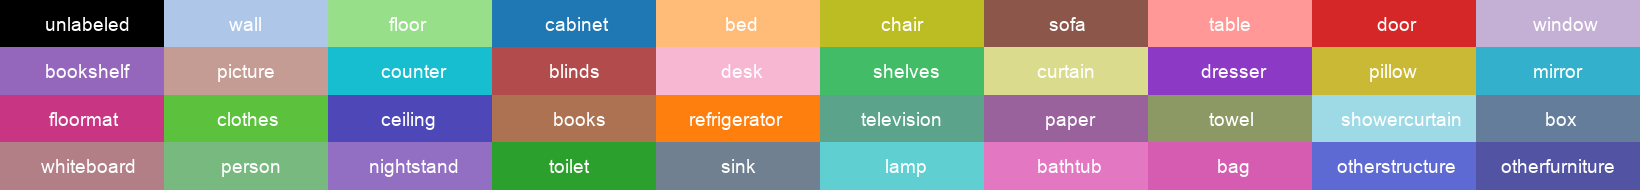

In [6]:
import os
import sys
from pathlib import Path

ASL = os.path.join(str(Path.home()), "ASL")
src = os.path.join(str(Path.home()), "ASL", "src")
os.chdir( ASL )
sys.path.append(ASL)
sys.path.append(src)


from lightning import Network
from utils_asl import load_yaml
from visu import Visualizer

vi = Visualizer(p_visu="docs")

textwidth = 12.7 #cm


import matplotlib
import matplotlib.pyplot as plt
import skimage
from PIL import Image, ImageDraw
import imageio 
import numpy as np
import torch
import cv2
import pandas
from visu import *

h,w = 190, 1640
arr = np.zeros ( (h,w) )
for i in range(40):
   w_idx = i % 10
   h_idx = int( i/10 )
   arr[ int( (h/4) * h_idx) : int( (h/4)*(h_idx+1)), int( (w/10) * w_idx) : int( (w/10)*(w_idx+1))] = i

arr

ma = vi.plot_detectron( np.zeros( (h,w,3) ) , arr , alpha=1, text_off=False, jupyter=True,  draw_bound=False, font_size= 19, shift= 4)

In [7]:
from datasets_asl import MLHypersim
from datasets_asl import ScanNet

mld = MLHypersim(
    root = "/home/jonfrey/Datasets/mlhypersim",
    mode="train",
    scenes=["ai_001_002", "ai_001_003", "ai_001_004", "ai_001_005", "ai_001_006"],
    output_trafo=None,
    output_size=(480,640),
    degrees=0,
    flip_p=0,
    jitter_bcsh=[0, 0, 0, 0],
    data_augmentation=False    
)

img, label, img_ori = mld[0]

ml =  [ Image.fromarray( np.uint8( mld[k][2].permute(1,2,0).numpy() * 255 ) ) for k in [0,410,1010]  ]

ml_l =  [ Image.fromarray(vi.plot_detectron(mld[k][2],mld[k][1]+1,alpha=0.85, text_off =True, jupyter=False,  draw_bound=False))
       for k in [0,410,1010]  ]
       
snd = ScanNet(
    root="/home/jonfrey/Datasets/scannet",
    mode="val",
    scenes=[],
    output_trafo=None,
    output_size=(480, 640),
    degrees=10,
    flip_p=0.5,
    jitter_bcsh=[0.3, 0.3, 0.3, 0.05]
  )

sn =  [ Image.fromarray( np.uint8( snd[k][2].permute(1,2,0).numpy() * 255 ) ) for k in [0,1140,2000]  ]
sn_l =  [ Image.fromarray(vi.plot_detectron(snd[k][2],snd[k][1]+1,alpha=0.85, text_off =True, jupyter=False,  draw_bound=False))
       for k in [0,1140,2000]  ]

Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1060.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1060.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1070.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1070.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1080.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1080.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1090.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1090.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1100.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1100.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1110.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/c

Image not found  /home/jonfrey/Datasets/scannet/scans/scene0089_00/color/890.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0089_00/label-filt/900.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0089_00/color/900.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0089_00/label-filt/910.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0089_00/color/910.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0089_00/label-filt/920.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0089_00/color/920.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0089_00/label-filt/930.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0089_00/color/930.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0089_00/label-filt/940.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0089_00/color/940.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0089_00/label-filt/950.pn

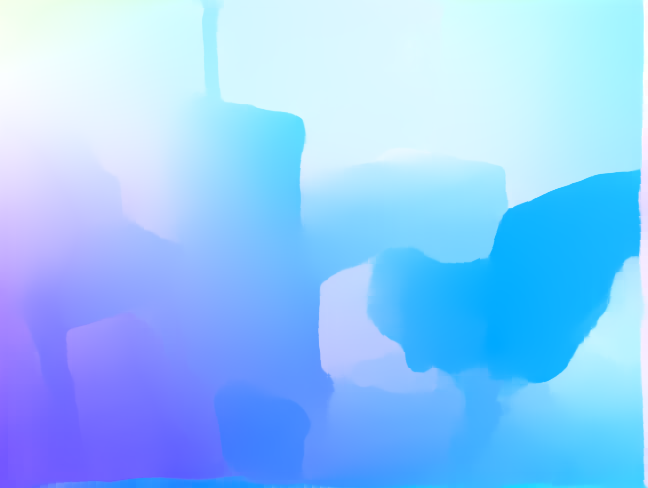

'/media/scratch1/jonfrey/dataset/scannet/scans/scene0000_00/color/310.jpg'

In [8]:
def readFlowKITTI(filename):
    flow = cv2.imread(filename, cv2.IMREAD_ANYDEPTH|cv2.IMREAD_COLOR)
    flow = flow[:,:,::-1].astype(np.float32)
    flow, valid = flow[:, :, :2], flow[:, :, 2].astype(bool)
    flow = (flow - 2**15) / 64.0
    H,W = 960,1280
    return flow, valid
flow, valid = readFlowKITTI('docs/flow_example_data/scene0000_00_color_300-310low.png')
flow, valid = readFlowKITTI('docs/flow_example_data/scene0000_00_color_300-310up.png')

vi.plot_flow(flow, jupyter=True, store='flow_example.png')

"/media/scratch1/jonfrey/dataset/scannet/scans/scene0000_00/color/300.jpg"
"/media/scratch1/jonfrey/dataset/scannet/scans/scene0000_00/color/310.jpg"
    